# GradientBoostingClassifier for 17 groups with 25 parameters 

### Обучение модели классификации задач по 17 группам

Загрузка необходимых библиотек и модулей

In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import json
import numpy as np
from definitions import ROOT_DIR

Загружаем данные токенизированного датасета для классификации задач по группам

In [2]:
with open(ROOT_DIR + "/Data/training_grouping_dataset.json", "r") as n:
            n = json.load(n)
data = np.asarray(n['data'], dtype=np.int64)
target = np.asarray(n['target'], dtype=np.int64)

In [3]:
data.shape, target.shape

((4991, 25), (4991,))

In [4]:
token_name_list = [
    'ADJ', 
    'ADP',
    'ADV',
    'AUX',
    'CCONJ',
    'DET',
    'INTJ',
    'NOUN',
    'NUM',
    'PART',
    'PRON',
    'PROPN',
    'PUNCT',
    'SCONJ',
    'SYM',
    'VERB',
    'X',
    'all_to_num',
    'exist_question',
    'negative_numbers',
    'more_hundred',
    'exist_noun_in',
    'question_in_end',
    'question_not_end',
    'group_calculate',
]
n['feature_names'] = token_name_list

In [5]:
def plot_feature_importances(model):
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), n['feature_names'])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

## Calculate of default model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Correctness on the training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Correctness on a test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Correctness on the training set: 0.624
Correctness on a test set: 0.372


#### Визуализация важности признаков

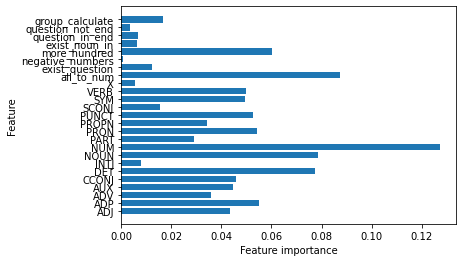

In [14]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
plot_feature_importances(gbrt)

## Обучение с вариацией по двум параметрам: max_features, max_depth

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
data, target, stratify=target, random_state=42)
max_score = 0
for i in range(1,30):
    for j in range(1,25):
        gbrt = GradientBoostingClassifier( max_depth=i, max_features=j,random_state=0)
        gbrt.fit(X_train, y_train)
        if max_score < gbrt.score(X_test, y_test):
            print(f"{i}, {j}", "Correctness on the training set: {:.3f}".format(gbrt.score(X_train, y_train)))
            print(f"{i}, {j}", "Correctness on a test set: {:.3f}".format(gbrt.score(X_test, y_test)))
            print()
            max_score = gbrt.score(X_test, y_test)

1, 1 Correctness on the training set: 0.309
1, 1 Correctness on a test set: 0.295

1, 2 Correctness on the training set: 0.341
1, 2 Correctness on a test set: 0.334

1, 4 Correctness on the training set: 0.360
1, 4 Correctness on a test set: 0.337

1, 6 Correctness on the training set: 0.356
1, 6 Correctness on a test set: 0.339

2, 2 Correctness on the training set: 0.430
2, 2 Correctness on a test set: 0.356

2, 10 Correctness on the training set: 0.466
2, 10 Correctness on a test set: 0.362

2, 14 Correctness on the training set: 0.470
2, 14 Correctness on a test set: 0.363

3, 3 Correctness on the training set: 0.551
3, 3 Correctness on a test set: 0.366

3, 8 Correctness on the training set: 0.606
3, 8 Correctness on a test set: 0.370

4, 1 Correctness on the training set: 0.579
4, 1 Correctness on a test set: 0.378

4, 2 Correctness on the training set: 0.651
4, 2 Correctness on a test set: 0.385

6, 11 Correctness on the training set: 0.960
6, 11 Correctness on a test set: 0.387

KeyboardInterrupt: 

### max_features=5 , max_depth=16

Correctness on the training set: 0.984
Correctness on a test set: 0.401


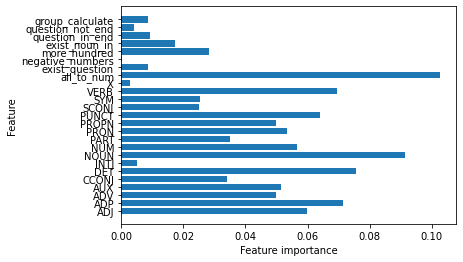

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
data, target, stratify=target, random_state=42)
gbrt = GradientBoostingClassifier(max_features=5, max_depth=16, random_state=0)
gbrt.fit(X_train, y_train)
print("Correctness on the training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Correctness on a test set: {:.3f}".format(gbrt.score(X_test, y_test)))
plot_feature_importances(gbrt)

In [8]:
from sklearn.metrics import confusion_matrix
prediction = gbrt.predict(X_test)
confusion = confusion_matrix(y_test, prediction)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[168  18  23  25   6   6   6   1   6   1   0   0   4   0   1   1   0   0]
 [ 51  94  14  14   1   0   0   0   0   0   0   1   0   1   0   0   2   0]
 [ 54  20  59  19   5   3   2   2   0   0   2   0   0   0   0   1   2   1]
 [ 45  13  18  68   5   2   0   1   0   0   0   0   0   0   0   1   2   0]
 [ 27   4  20  12  21   6   0   1   0   0   0   1   0   1   0   1   0   1]
 [ 12   6  10   2   6  25   3   1   5   1   2   0   0   0   1   0   0   0]
 [  8   3  15   2   1   4  20   0   1   1   0   1   0   2   0   0   0   0]
 [ 14   3   7   9   1   3   0  11   1   0   0   1   0   0   0   0   1   0]
 [  4   3  16   4   1   7   1   1  10   0   0   0   0   0   1   1   0   0]
 [  6   2   4   3   2   3   0   0   0   4   0   0   0   0   0   2   3   0]
 [  3   1   9   2   0   0   1   0   0   0   5   0   1   0   0   0   0   2]
 [  3   3   3   1   2   0   2   0   0   0   0   6   0   0   0   0   1   1]
 [  2   1   5   1   3   1   0   0   1   1   3   0   2   0   0   1   0   0]
 [  2  

Confusion matrix
[[0.63157895 0.06766917 0.08646617 0.09398496 0.02255639 0.02255639
  0.02255639 0.0037594  0.02255639 0.0037594  0.         0.
  0.01503759 0.         0.0037594  0.0037594  0.         0.        ]
 [0.28651685 0.52808989 0.07865169 0.07865169 0.00561798 0.
  0.         0.         0.         0.         0.         0.00561798
  0.         0.00561798 0.         0.         0.01123596 0.        ]
 [0.31764706 0.11764706 0.34705882 0.11176471 0.02941176 0.01764706
  0.01176471 0.01176471 0.         0.         0.01176471 0.
  0.         0.         0.         0.00588235 0.01176471 0.00588235]
 [0.29032258 0.08387097 0.11612903 0.43870968 0.03225806 0.01290323
  0.         0.00645161 0.         0.         0.         0.
  0.         0.         0.         0.00645161 0.01290323 0.        ]
 [0.28421053 0.04210526 0.21052632 0.12631579 0.22105263 0.06315789
  0.         0.01052632 0.         0.         0.         0.01052632
  0.         0.01052632 0.         0.01052632 0.         0.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Multiplication and division'),
  Text(1, 0, 'Addition and subtraction'),
  Text(2, 0, 'Fractions'),
  Text(3, 0, 'Mixed operations'),
  Text(4, 0, 'Measurements'),
  Text(5, 0, 'Figures'),
  Text(6, 0, 'Number'),
  Text(7, 0, 'Modelling'),
  Text(8, 0, 'Geometry'),
  Text(9, 0, 'Time'),
  Text(10, 0, 'Comparison'),
  Text(11, 0, 'Estimation'),
  Text(12, 0, 'Logic'),
  Text(13, 0, 'Series and pattern'),
  Text(14, 0, 'Graph'),
  Text(15, 0, 'Probability'),
  Text(16, 0, 'Money'),
  Text(17, 0, 'Other')])

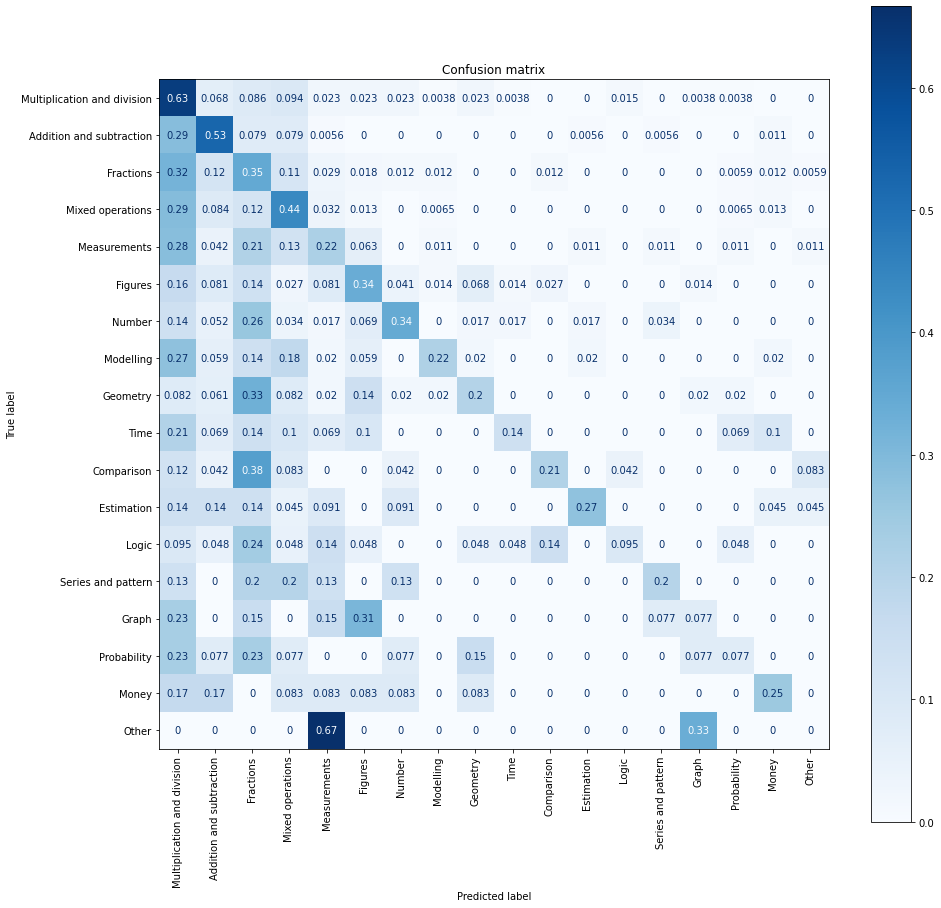

In [9]:
from sklearn.metrics import plot_confusion_matrix
class_names = ("Multiplication and division", 
               "Addition and subtraction", 
               "Fractions", 
               "Mixed operations", 
               "Measurements", 
               "Figures", 
               "Number", 
               "Modelling", 
               "Geometry", 
               "Time", 
               "Comparison", 
               "Estimation", 
               "Logic", 
               "Series and pattern",
               "Graph",
               "Probability", 
               "Money", 
               "Other",
              )
title = "Confusion matrix"
fig, ax = plt.subplots(figsize=(15, 15))
disp = plot_confusion_matrix(gbrt, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 ax=ax
                            )
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)
plt.xticks(rotation=90)

## Обучение с вариацией по трем параметрам: max_depth, max_features , n_estimators

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
data, target, stratify=target, random_state=42)
max_score = 0
for i in range(1,30):
    for j in range(1,25):
        for k in range(1, 100):
            gbrt = GradientBoostingClassifier(max_depth=i, max_features=j, n_estimators=k, random_state=0)
            gbrt.fit(X_train, y_train)
            if max_score < gbrt.score(X_test, y_test):
                print(f"{i}, {j}, {k}")
                print("Correctness on the training set: {:.3f}".format(gbrt.score(X_train, y_train)))
                print("Correctness on a test set: {:.3f}".format(gbrt.score(X_test, y_test)))
                print()
                max_score = gbrt.score(X_test, y_test)

1, 1, 1
Correctness on the training set: 0.651
Correctness on a test set: 0.651

1, 2, 94
Correctness on the training set: 0.670
Correctness on a test set: 0.653

1, 3, 82
Correctness on the training set: 0.670
Correctness on a test set: 0.655

1, 4, 99
Correctness on the training set: 0.679
Correctness on a test set: 0.657

2, 1, 70
Correctness on the training set: 0.679
Correctness on a test set: 0.659

2, 2, 60
Correctness on the training set: 0.689
Correctness on a test set: 0.662

2, 2, 70
Correctness on the training set: 0.693
Correctness on a test set: 0.664

2, 2, 89
Correctness on the training set: 0.705
Correctness on a test set: 0.666

2, 2, 99
Correctness on the training set: 0.708
Correctness on a test set: 0.670

2, 3, 71
Correctness on the training set: 0.700
Correctness on a test set: 0.672

2, 3, 85
Correctness on the training set: 0.715
Correctness on a test set: 0.675

2, 3, 95
Correctness on the training set: 0.724
Correctness on a test set: 0.677

2, 3, 97
Correctn

KeyboardInterrupt: 

### max_depth=9, max_features=1 , n_estimators=32

Correctness on the training set: 0.844
Correctness on a test set: 0.360


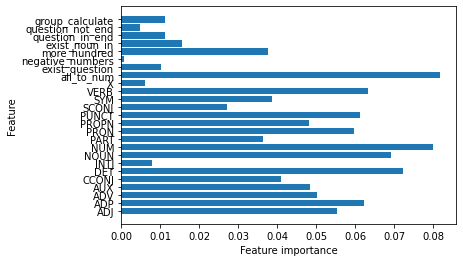

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
data, target, stratify=target, random_state=42)
gbrt = GradientBoostingClassifier(max_depth=9, max_features=1 , n_estimators=32, random_state=0)
gbrt.fit(X_train, y_train)
print("Correctness on the training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Correctness on a test set: {:.3f}".format(gbrt.score(X_test, y_test)))
plot_feature_importances(gbrt)

In [16]:
from sklearn.metrics import confusion_matrix
prediction = gbrt.predict(X_test)
confusion = confusion_matrix(y_test, prediction)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[173  24  16  16   3   8   6   4   3   1   2   0   3   2   1   2   1   1]
 [ 46  88  10  21   0   2   2   2   1   0   1   2   2   0   0   1   0   0]
 [ 66  17  43  20   6   8   4   1   1   0   2   1   0   0   0   1   0   0]
 [ 44  25  20  44   5   3   1   1   1   0   1   1   3   2   2   1   1   0]
 [ 32   4  16   8  18   8   1   2   2   0   1   0   1   0   1   0   1   0]
 [ 16   4   9   3   6  25   6   1   2   0   0   0   0   0   0   1   0   1]
 [ 12   1   7   5   1   9  15   0   2   0   1   2   1   1   1   0   0   0]
 [ 16   4   4   7   3   1   0  13   1   0   0   0   1   0   0   0   1   0]
 [  8   3  12   3   3   9   1   1   7   0   0   0   0   0   1   0   1   0]
 [ 10   2   4   2   1   2   0   0   0   4   0   0   0   1   0   0   3   0]
 [  5   2   4   2   0   1   2   0   0   0   8   0   0   0   0   0   0   0]
 [  4   2   3   2   2   0   1   1   1   0   1   5   0   0   0   0   0   0]
 [  2   3   4   0   2   2   1   0   0   1   4   0   0   0   1   0   1   0]
 [  2  

Confusion matrix
[[0.65037594 0.09022556 0.06015038 0.06015038 0.0112782  0.03007519
  0.02255639 0.01503759 0.0112782  0.0037594  0.0075188  0.
  0.0112782  0.0075188  0.0037594  0.0075188  0.0037594  0.0037594 ]
 [0.25842697 0.49438202 0.05617978 0.11797753 0.         0.01123596
  0.01123596 0.01123596 0.00561798 0.         0.00561798 0.01123596
  0.01123596 0.         0.         0.00561798 0.         0.        ]
 [0.38823529 0.1        0.25294118 0.11764706 0.03529412 0.04705882
  0.02352941 0.00588235 0.00588235 0.         0.01176471 0.00588235
  0.         0.         0.         0.00588235 0.         0.        ]
 [0.28387097 0.16129032 0.12903226 0.28387097 0.03225806 0.01935484
  0.00645161 0.00645161 0.00645161 0.         0.00645161 0.00645161
  0.01935484 0.01290323 0.01290323 0.00645161 0.00645161 0.        ]
 [0.33684211 0.04210526 0.16842105 0.08421053 0.18947368 0.08421053
  0.01052632 0.02105263 0.02105263 0.         0.01052632 0.
  0.01052632 0.         0.01052632 0.      

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Multiplication and division'),
  Text(1, 0, 'Addition and subtraction'),
  Text(2, 0, 'Fractions'),
  Text(3, 0, 'Mixed operations'),
  Text(4, 0, 'Measurements'),
  Text(5, 0, 'Figures'),
  Text(6, 0, 'Number'),
  Text(7, 0, 'Modelling'),
  Text(8, 0, 'Geometry'),
  Text(9, 0, 'Time'),
  Text(10, 0, 'Comparison'),
  Text(11, 0, 'Estimation'),
  Text(12, 0, 'Logic'),
  Text(13, 0, 'Series and pattern'),
  Text(14, 0, 'Graph'),
  Text(15, 0, 'Probability'),
  Text(16, 0, 'Money'),
  Text(17, 0, 'Other')])

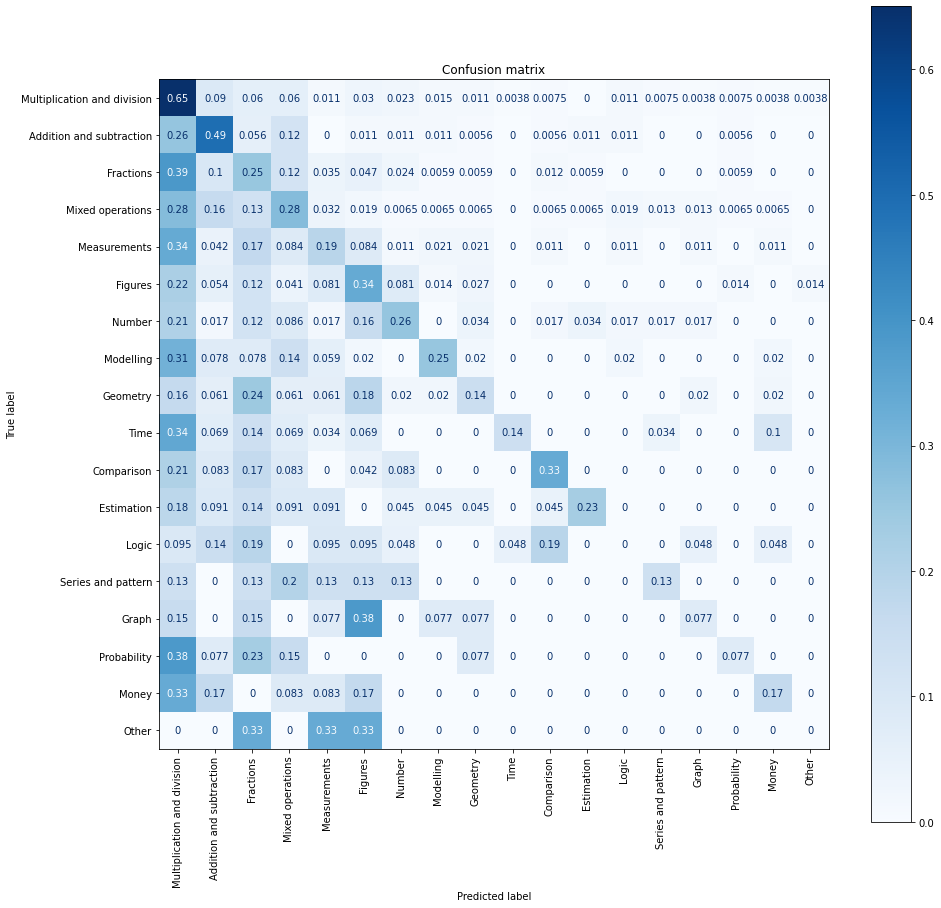

In [17]:
from sklearn.metrics import plot_confusion_matrix
class_names = ("Multiplication and division", 
               "Addition and subtraction", 
               "Fractions", 
               "Mixed operations", 
               "Measurements", 
               "Figures", 
               "Number", 
               "Modelling", 
               "Geometry", 
               "Time", 
               "Comparison", 
               "Estimation", 
               "Logic", 
               "Series and pattern",
               "Graph",
               "Probability", 
               "Money", 
               "Other",
              )
# class_names = ('number_properties', 'geometry', 'measurement', 'algebra', 'data_and_probability')
title = "Confusion matrix"
fig, ax = plt.subplots(figsize=(15, 15))
disp = plot_confusion_matrix(gbrt, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize='true',
                                 ax=ax
                            )
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)
plt.xticks(rotation=90)

## Сохранение и загрузка обученных моделей

# Save model

In [10]:
import pickle
# save the model to disk
filename = ROOT_DIR + '/Data/Models/gbrt_grouping_model.sav'
pickle.dump(gbrt, open(filename, 'wb'))

# Load model

In [11]:
# load the model from disk
filemane = ROOT_DIR + '/Data/Models/gbrt_grouping_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.4014423076923077
